# Data Science I Topic 3.2 - Inferential Statistics

In [1]:
import numpy as np
from scipy import stats
from IPython.display import Image


Answer the following questions. Please search the necessary distribution tables or calculators yourselves. In the exam you will not need to perform double or triple summations so feel free to use nested loops or list comprehensions in the code cells whenever you think appropriate.

**Q1**

Explain briefly with your own words:

1. Type I and Type II errors \
**Ans:** "Type I Error" refers to the case in which the null hypothesis is rejected when it is actually true. The "Type II Error", on the other hand, refers to the case in which the null hypothesis is not rejected, while it is actually false.
2. Level of significance $\alpha$ \
**Ans:** It corresponds to the maximum probability error that one is willing to accept when rejecting the null hypothesis
3. Region of rejection \
**Ans:** It corresponds to the set of values of the test's statistical score that lead to the rejection of the null hypothesis. This regions is defined by the significance level.
4. $p$-value \
**Ans:** It is the likelihood of scores more or equally extreme than the obtained test's score to happen when the null hypothesis is true. If the p-value is lower than the significance level, the null hypothesis is rejected.

***

**Q2**
The weights of salmon grown at a commercial hatchery are normally distributed with a standard deviation of 0.6 kg. The hatchery claims that the mean weight of this year’s crop is **at least** 3.8 kg. Suppose a random sample of 16 fish yielded an average weight of 3.6 kg. Is this strong enough evidence to reject the hatchery’s claims at the 1 percent level of significance? What is the $p$-value?

In [2]:
mean_h0 = 3.8
std = 0.6
sample_size = 16

z_score = (3.6 - mean_h0)/(std/np.sqrt(sample_size))

# left tail test
p_value = stats.norm.cdf(z_score)

critical_z = stats.norm.ppf(0.01)

print("z-score: {}".format(z_score))
print("critical z: {}".format(critical_z))
print("P-value: {}".format(p_value))

z-score: -1.3333333333333317
critical z: -2.3263478740408408
P-value: 0.09121121972586815


***

**Q3**
The following data summary was obtained from a comparison of the lead content of human hair removed from adult individuals that had died between 1880 and 1920 with the lead content of present-day adults. The data are in units of micrograms, equal to one-millionth of a gram.

||1880–1920|Today|
|:-|:-:|:-:|
Sample size: | 30 | 100
Sample mean: | 48.5 | 26.6
Sample standard deviation: | 14.5 | 12.3

Do the above data establish, at the 1 percent level of significance, that the
mean lead content of human hair is less today than it was in the years between 1880 and 1920?

In [3]:
mean_past = 48.5
mean_present = 26.6
sample_std_past = 14.5
sample_std_present = 12.3
num_obs_past = 30
num_obs_present = 100
equal_var = True # initial guess, which will be checked

f_statistic = (sample_std_past/sample_std_present)**2

p_value_f_test = 2*(1 - stats.f.cdf(f_statistic, 29, 99))
print("p-value of Fmax test: ", p_value)
if p_value_f_test < 0.01:
    print("Variances are different")
    equal_var = False
else:
    print("Variances are equal")

test_result = stats.ttest_ind_from_stats(mean1=mean_past, std1=sample_std_past,
                           mean2=mean_present, std2=sample_std_present,
                           nobs1=30, nobs2=100,
                           equal_var=equal_var)

if test_result.pvalue < 0.01:
    print("Means different. p-value is ", test_result.pvalue)
else:
    print("Means equal")

p-value of Fmax test:  0.09121121972586815
Variances are equal
Means different. p-value is  2.190244799552259e-13


***

**Q4**

The table contains a simplified dataset containing samples from 5 different methods. Can you conclude that different method may give different outcomes?
<img src="T3_2_Lp45.png" width="200">

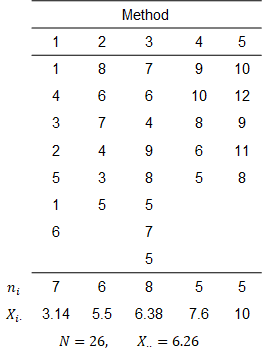

In [4]:
# Colab
Image("./content/T3_2_Lp45.png")

In [5]:
method1 = [1,4,3,2,5,1,6]
method2 = [8,6,7,4,3,5]
method3 = [7,6,4,9,8,5,7,5]
method4 = [9,10,8,6,5]
method5 = [10,12,9,11,8]

stats.f_oneway(method1, method2, method3, method4, method5)

F_onewayResult(statistic=11.188925315353176, pvalue=2.0541256566729395e-05)

***
**Q5**

We want to test whether material, temperature, or the combination of a certain material and temperature affects the generator lifetime. The table below shows the generator lifetime (in months) for given materials and operational temperatures.

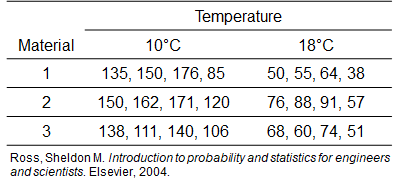

In [6]:
# Colab
Image("./content/T3_2_Lp49.png")

In [26]:
m_1_t_10 = [135, 150, 176, 85]
m_2_t_10 = [150, 162, 171, 120]
m_3_t_10 = [138, 111, 140, 106]
m_1_t_18 = [50, 55, 64, 38]
m_2_t_18 = [76, 88, 91, 57]
m_3_t_18 = [68, 60, 74, 51]

data = np.array([[m_1_t_10, m_1_t_18], [m_2_t_10, m_2_t_18], [m_3_t_10, m_3_t_18]])

n_rows = data.shape[0]
n_cols = data.shape[1]
group_size = data.shape[2]

means_per_row = np.mean(data, axis=(1,2), keepdims=True)
means_per_col = np.mean(data, axis=(0,2), keepdims=True)
means_per_group = np.mean(data, axis=2, keepdims=True)

mean_overall = np.mean(data)

# Sum of Squares within Row (SS_r)
ss_r = (n_cols * group_size)*np.sum((means_per_row - mean_overall)**2)
df_r = n_rows - 1

# Sum of Squares within Column (SS_c)
ss_c = (n_rows * group_size)*np.sum((means_per_col - mean_overall)**2)
df_c = n_cols - 1

# Sum of Squares Interaction
ss_inter = group_size * np.sum((means_per_group - means_per_col - means_per_row + mean_overall)**2)
df_inter = means_per_group.size - n_rows - n_cols + 1

# Error
ss_e = np.sum((data - means_per_group)**2)
df_e = data.size - n_rows*n_cols

In [27]:
# Hypothesis Test for Row Difference

f_stat_row = (ss_r/df_r) / (ss_e/df_e)
p_value_row = 1 - stats.f.cdf(f_stat_row, df_r, df_e)

print(f"p-value rows: {p_value_row}")
print(f"F-statisc rows: {f_stat_row}")

p-value rows: 0.11188881096597414
F-statisc rows: 2.479761904761905


In [28]:
# Hypothesis Test for Col Difference
f_stat_col = (ss_c/df_c) / (ss_e/df_e)
p_value_col = 1 - stats.f.cdf(f_stat_col, df_c, df_e)

print(f"p-value for cols: {p_value_col}")
print(f"F-statisc cols: {f_stat_col}")

p-value for cols: 1.3372722562632333e-07
F-statisc cols: 69.63223443223444


In [29]:
# Hypothesis Test for Interaction Difference
f_stat_inter = (ss_inter/df_inter) / (ss_e/df_e)
p_value_inter = 1 - stats.f.cdf(f_stat_inter, df_inter, df_e)

print("")
print(f"p-value interaction: {p_value_inter}")
print(f"F-statisc interaction: {f_stat_inter}")


p-value interaction: 0.535744622998638
F-statisc interaction: 0.6462454212454213


***
**Q6**

Given the weekly number of accidents over a stretch of an Autobahn over a 30-week period:

8, 0, 0, 1, 3, 4, 0, 2, 12, 5, 1, 8, 0, 2, 0, 1, 9, 3, 4, 5, 3, 3, 4, 7, 4, 0, 1, 2, 1, 2

Test the hypothesis that the number of accidents in a week has a Poisson distribution. Let $Y$ be the random variable representing the weekly number of accidents, break up the possible values into $k$=5 regions as follow:
(1) $Y$=0, (2) $Y$=1, (3) $Y$=2 "or" 3, (4) $Y$=4 "or" 5, (5) $Y$>5.

In [ ]:
num_accidents = [8, 0, 0, 1, 3, 4, 0, 2, 12, 5, 1, 8, 0, 2, 0, 1, 9, 3, 4, 5, 3, 3, 4, 7, 4, 0, 1, 2, 1, 2]

